In [3]:
# %load quick_imports.txt
# %load quick_imports.txt
import random
import sys

import numpy as np
import matplotlib.pyplot as plt

# Bokeh imports
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure, output_file, ColumnDataSource, reset_output
from bokeh.models import HoverTool
output_notebook()

from ipywidgets.widgets import Text

#scipy constants
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import Planck as h
from scipy.constants import speed_of_light as c0
from scipy.constants import R

sys.path.append('../CNT-SIM/')
from CNTSimFile import CNTSimFile
from mc_sim import exciton_sim_4_level, exciton_sim_4_lvl_full_exchange

Loading BokehJS ...

In [4]:
k_er_per_s = 2e10  # constant for radiativ decay from S11
k_br_per_s = 2e10  # constant for radiativ decay from S11*
k_enr_per_s = 1e10  # constant of non-radiativ decay from S11
k_bnr_per_s = 1e10  # constant for non-radiativ decay from S11*

k_de_per_s = 1e09  # constant for going from dark to S11 state
k_ed_per_s = 5e10  # constant for going from S11 to dark statestate

# termal detrapping 10.1021/acs.jpclett.8b03732
k_bd_per_s = 0.5 * (1e12 / 385 + 1e12 / 1132) + 0.1e12 * np.exp(-1.6182e-11 /
                                                                (kB * 300))

kin_const_1 = np.array([k_br_per_s, k_er_per_s, k_bnr_per_s, k_enr_per_s, k_bd_per_s, k_ed_per_s, k_de_per_s])

In [5]:
exc_sim_def_1 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_level-def_1.h5', kin_const_1)

Existing file loaded successfully.


../CNT-SIM/CNTSimFile.py:30: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


In [6]:
exc_sim_def_1.calc_dict['comment'] = 'bug in bright state k_noting calculation'
exc_sim_def_1.save()

In [9]:
exc_sim_def_2 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_level-def_2.h5', kin_const_1)

Existing file loaded successfully.


../CNT-SIM/CNTSimFile.py:30: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


In [11]:
exc_sim_def_3 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_level-def_3.h5', kin_const_1)

Existing file loaded successfully.


In [13]:
exc_sim_len_1 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_level-len_1.h5', kin_const_1)

Existing file loaded successfully.


In [15]:
exc_sim_len_2 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_level-len_2.h5', kin_const_1)

Existing file loaded successfully.


In [17]:
exc_sim_len_3 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_level-len_3.h5', kin_const_1)

Existing file loaded successfully.


In [26]:
defect_calc = [exc_sim_def_3, exc_sim_def_1, exc_sim_def_2]
length_calc = [exc_sim_len_3, exc_sim_len_1, exc_sim_len_2]
color_list = np.array(['blue', 'orange', 'green', 'red', 'black'])

In [48]:
exciton_sim_4_level??

## Defect dependence

### E11*

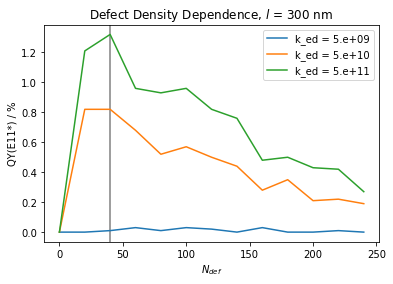

In [73]:
plt.axvline(40, alpha=0.5, color='black')
for i, sim in enumerate(defect_calc):
    plt.plot(sim.calc_dict['n_defects'], sim.QY[:, 0]*100, label=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}')
plt.legend()
plt.xlabel('$N_{def}$')
plt.ylabel('QY(E11*) / %')
plt.title('Defect Density Dependence, $l$ = 300 nm')
plt.savefig('../../tmp/2020-04-16_exciton_sim_4_level-QY-defectstate-defect-dependence.png', dpi=500)

In [12]:
plot = figure(title='Defect Density Relation, l = 300 nm', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(defect_calc):
    plot.line(sim.calc_dict['n_defects'], sim.QY[:, 0]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}', color=color_list[i])
plot.xaxis.axis_label = 'N (defects)'
plot.yaxis.axis_label = 'QY (E11*)'
show(plot)

### E11

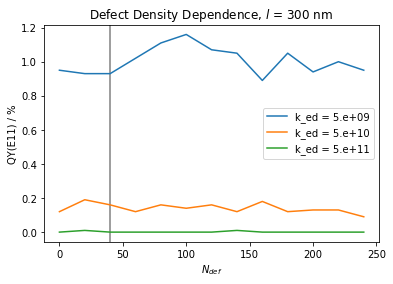

In [72]:
plt.axvline(40, alpha=0.5, color='black')
for i, sim in enumerate(defect_calc):
    plt.plot(sim.calc_dict['n_defects'], sim.QY[:, 1]*100, label=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}')
plt.legend()
plt.xlabel('$N_{def}$')
plt.ylabel('QY(E11) / %')
plt.title('Defect Density Dependence, $l$ = 300 nm')
plt.savefig('../../tmp/2020-04-16_exciton_sim_4_level-QY-excitedstate-defect-dependence.png', dpi=500)

In [14]:
plot = figure(title='Defect Density Relation, l = 300 nm', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(defect_calc):
    plot.line(sim.calc_dict['n_defects'], sim.QY[:, 1]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}', color=color_list[i])
plot.xaxis.axis_label = 'N (defects)'
plot.yaxis.axis_label = 'QY (E11)'
show(plot)

In [15]:
k_relation = np.zeros((3,3))
for i, sim in enumerate(defect_calc):
    k_relation[0, i] = sim.kin_const[5]
    k_relation[1:, i] = sim.QY[2, :]

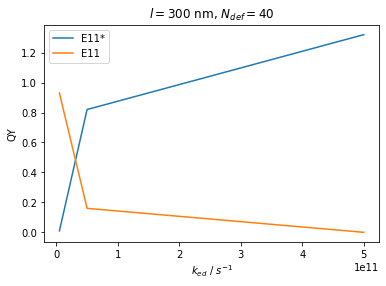

In [76]:
plt.plot(k_relation[0, :], k_relation[1, :]*100, label='E11*')
plt.plot(k_relation[0, :], k_relation[2, :]*100, label='E11')
plt.title('$l=300$ nm, $N_{def} = 40$')
plt.legend()
plt.ylabel('QY')
plt.xlabel('$k_{ed}$ / $s^{-1}$')
plt.savefig('../../tmp/2020-04-16_exciton_sim_4_level-QY-at-N_def-40.png', dpi=500)

## Length dependance

### E11*

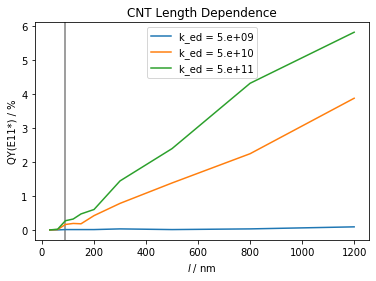

In [74]:
plt.axvline(90, alpha=0.5, color='black')
for i, sim in enumerate(length_calc):
    plt.plot(sim.calc_dict['CNT_length'], sim.QY[:, 0]*100, label=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}')
plt.legend()
plt.xlabel('$l$ / nm')
plt.ylabel('QY(E11*) / %')
plt.title('CNT Length Dependence')
plt.savefig('../../tmp/2020-04-16_exciton_sim_4_level-QY-defectstate-length-dependence.png', dpi=500)

In [36]:
plot = figure(title='Length Density Relation', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(length_calc):
    plot.line(sim.calc_dict['CNT_length'], sim.QY[:, 0]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}', color=color_list[i])
plot.xaxis.axis_label = '$l$ / nm'
plot.yaxis.axis_label = 'QY (E11*)'
show(plot)

### E11

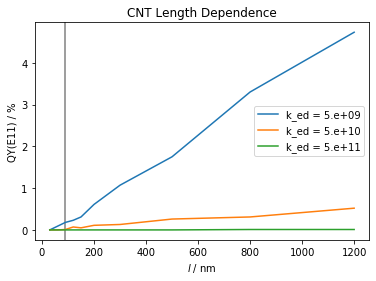

In [75]:
plt.axvline(90, alpha=0.5, color='black')
for i, sim in enumerate(length_calc):
    plt.plot(sim.calc_dict['CNT_length'], sim.QY[:, 1]*100, label=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}')
plt.legend()
plt.xlabel('$l$ / nm')
plt.ylabel('QY(E11) / %')
plt.title('CNT Length Dependence')
plt.savefig('../../tmp/2020-04-16_exciton_sim_4_level-QY-excitedstate-length-dependence.png', dpi=500)

In [40]:
plot = figure(title='Length Density Relation,', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(length_calc):
    plot.line(sim.calc_dict['CNT_length'], sim.QY[:, 1]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}', color=color_list[i])
plot.xaxis.axis_label = '$l$ / nm'
plot.yaxis.axis_label = 'QY (E11)'
show(plot)

In [41]:
k_relation_l = np.zeros((3,3))
for i, sim in enumerate(length_calc):
    k_relation_l[0, i] = sim.kin_const[5]
    k_relation_l[1:, i] = sim.QY[2, :]

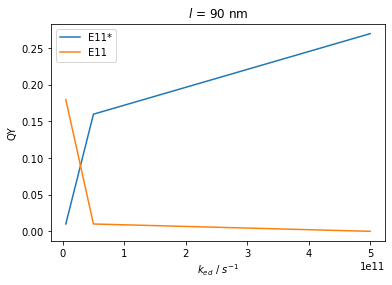

In [77]:
plt.plot(k_relation_l[0, :], k_relation_l[1, :]*100, label='E11*')
plt.plot(k_relation_l[0, :], k_relation_l[2, :]*100, label='E11')
plt.legend()
plt.title('$l$ = 90 nm')
plt.ylabel('QY')
plt.xlabel('$k_{ed}$ / $s^{-1}$')
plt.savefig('../../tmp/2020-04-16_exciton_sim_4_level-QY-at-length-90.png', dpi=500)

In [17]:
exc_sim_def_4 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_lvl_full_exchange-def_1.h5', kin_const_1)

Existing file loaded successfully.


../CNT-SIM/CNTSimFile.py:49: UserWarning: no p_fate key in file
  warn('no p_fate key in file')


In [18]:
exc_sim_def_5 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_lvl_full_exchange-def_2.h5', kin_const_1)

Existing file loaded successfully.


In [19]:
exc_sim_def_6 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_lvl_full_exchange-def_3.h5', kin_const_1)

Existing file loaded successfully.


In [20]:
exc_sim_len_4 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_lvl_full_exchange-len_1.h5', kin_const_1)

Existing file loaded successfully.


In [21]:
exc_sim_len_5 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_lvl_full_exchange-len_2.h5', kin_const_1)

Existing file loaded successfully.


In [22]:
exc_sim_len_6 = CNTSimFile('../sim_output/2020-04-16_exciton_sim_4_lvl_full_exchange-len_3.h5', kin_const_1)

Existing file loaded successfully.
